In [35]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Шаг 1. Анализ данных

In [36]:
df = pd.read_csv("startup data.csv")

In [37]:
df.head(5)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


## Смотрим колонки с пропусками

In [38]:
print(df.isna().sum())

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
labels                        0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobil

## Убираем параметры с малым количеством данных

In [39]:
df = df.drop(['Unnamed: 0', 'Unnamed: 6'], axis=1)

In [40]:
df.head(5)

,state_code,latitude,longitude,zip_code,id,city,name,labels,founded_at,closed_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,1,1/1/2007,NaN,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,1,1/1/2000,NaN,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,1,3/18/2009,NaN,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,1,1/1/2002,NaN,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,0,8/1/2010,10/1/2012,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_code                923 non-null    object 
 1   latitude                  923 non-null    float64
 2   longitude                 923 non-null    float64
 3   zip_code                  923 non-null    object 
 4   id                        923 non-null    object 
 5   city                      923 non-null    object 
 6   name                      923 non-null    object 
 7   labels                    923 non-null    int64  
 8   founded_at                923 non-null    object 
 9   closed_at                 335 non-null    object 
 10  first_funding_at          923 non-null    object 
 11  last_funding_at           923 non-null    object 
 12  age_first_funding_year    923 non-null    float64
 13  age_last_funding_year     923 non-null    float64
 14  age_first_

## Удаляем параметры, не влияющие на успешность стартапа

In [42]:
df = df.drop(['state_code', 'latitude', 'longitude', 'zip_code', 'id', 'labels', 'object_id'], axis=1)

In [43]:
df.head()

,city,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,San Diego,Bandsintown,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,...,1,0,1,0,0,0,0,1.0000,0,acquired
1,Los Gatos,TriCipher,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,...,0,1,0,0,1,1,1,4.7500,1,acquired
2,San Diego,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,...,0,0,0,1,0,0,0,4.0000,1,acquired
3,Cupertino,Solidcore Systems,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,...,0,0,0,0,1,1,1,3.3333,1,acquired
4,San Francisco,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,...,0,1,1,0,0,0,0,1.0000,1,closed


## Избавляемся от пропущенных значений

In [44]:
df['closed_at'] = df['closed_at'].fillna(0)
df['age_first_milestone_year'] = df['age_first_milestone_year'].fillna(0)
df['age_last_milestone_year'] = df['age_last_milestone_year'].fillna(0)
df = df.dropna(subset=['state_code.1'])

In [45]:
print(df.isna().sum())

city                        0
name                        0
founded_at                  0
closed_at                   0
first_funding_at            0
last_funding_at             0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
state_code.1                0
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
category_code               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvideo               0
is_ecommerce                0
is_biotech                  0
is_consulting               0
is_othercategory            0
has_VC                      0
has_angel                   0
has_roundA

## Соотношение в датасете успешных и неуспешных стартапов

In [64]:
print('Кол-во успешных стартапов:', df['status'].value_counts()['acquired'])
print('Кол-во неуспешных стартапов:',df['status'].value_counts()['closed'])
print('Процент успешных стартапов', 597/(597+325)*100, '%')

Кол-во успешных стартапов: 597
Кол-во неуспешных стартапов: 325
Процент успешных стартапов 64.75054229934925 %


## Распределение количества партнерств с другими бизнесами

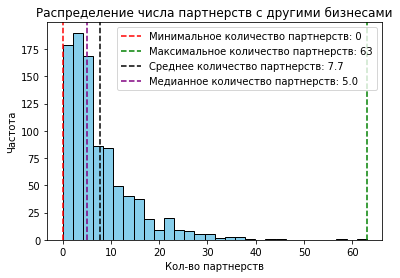

In [46]:
min_relationships = df['relationships'].min()
max_relationships = df['relationships'].max()
mean_relationships = round(df['relationships'].mean(), 2)
median_relationships = df['relationships'].median()

plt.figure(figsize=(6, 4))
plt.hist(df['relationships'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Кол-во партнерств')
plt.ylabel('Частота')
plt.title('Распределение числа партнерств с другими бизнесами')
plt.axvline(x=min_relationships, color='red', linestyle='--', label=f'Минимальное количество партнерств: {min_relationships}')
plt.axvline(x=max_relationships, color='green', linestyle='--', label=f'Максимальное количество партнерств: {max_relationships}')
plt.axvline(x=mean_relationships, color='black', linestyle='--', label=f'Среднее количество партнерств: {mean_relationships}')
plt.axvline(x=median_relationships, color='purple', linestyle='--', label=f'Медианное количество партнерств: {median_relationships}')
plt.legend()
plt.show()

### Как можно заметить, число партнерств варьируется от 0 до 63 при среднем, равном 7.7, и медиане, равной 5. График представляет собой логнормальное распределение. Обычно это распределение встречается в описании доходности активов.

## Распределение количества поднятых раундов инвестиций

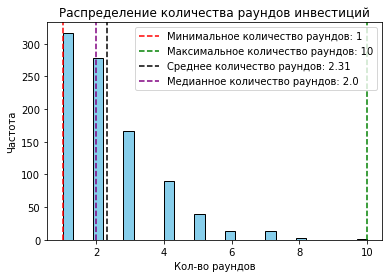

In [47]:
min_relationships = df['funding_rounds'].min()
max_relationships = df['funding_rounds'].max()
mean_relationships = round(df['funding_rounds'].mean(), 2)
median_relationships = df['funding_rounds'].median()

plt.figure(figsize=(6, 4))
plt.hist(df['funding_rounds'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Кол-во раундов')
plt.ylabel('Частота')
plt.title('Распределение количества раундов инвестиций')
plt.axvline(x=min_relationships, color='red', linestyle='--', label=f'Минимальное количество раундов: {min_relationships}')
plt.axvline(x=max_relationships, color='green', linestyle='--', label=f'Максимальное количество раундов: {max_relationships}')
plt.axvline(x=mean_relationships, color='black', linestyle='--', label=f'Среднее количество раундов: {mean_relationships}')
plt.axvline(x=median_relationships, color='purple', linestyle='--', label=f'Медианное количество раундов: {median_relationships}')
plt.legend()
plt.show()

### Количество раундов варьируется от 1 до 10 при среднем, равном 2.31, и медиане, равной 2. Большинство стартапов не привлекают более 3 раундов инвестиций

## Распределение количества привлеченных с раундов долларов

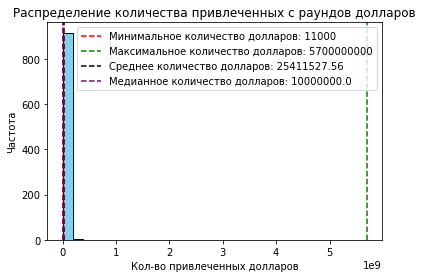

In [15]:
min_relationships = df['funding_total_usd'].min()
max_relationships = df['funding_total_usd'].max()
mean_relationships = round(df['funding_total_usd'].mean(), 2)
median_relationships = df['funding_total_usd'].median()

plt.figure(figsize=(6, 4))
plt.hist(df['funding_total_usd'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Кол-во привлеченных долларов')
plt.ylabel('Частота')
plt.title('Распределение количества привлеченных с раундов долларов')
plt.axvline(x=min_relationships, color='red', linestyle='--', label=f'Минимальное количество долларов: {min_relationships}')
plt.axvline(x=max_relationships, color='green', linestyle='--', label=f'Максимальное количество долларов: {max_relationships}')
plt.axvline(x=mean_relationships, color='black', linestyle='--', label=f'Среднее количество долларов: {mean_relationships}')
plt.axvline(x=median_relationships, color='purple', linestyle='--', label=f'Медианное количество долларов: {median_relationships}')
plt.legend()
plt.show()

### Почти никто из стартапов не привлек более 200 млн долларов при среднем, равном 25 млн, и медиане, равной 10 млн. Большинство стартапов не привлекают более 3 раундов инвестиций

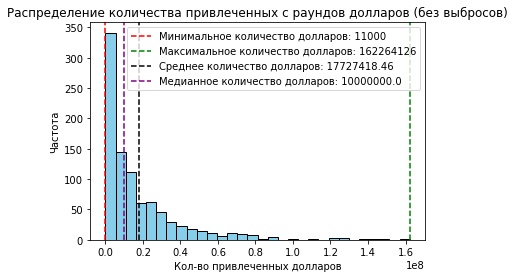

In [16]:
df1 = df[df['funding_total_usd']<200000000]
min_relationships = df1['funding_total_usd'].min()
max_relationships = df1['funding_total_usd'].max()
mean_relationships = round(df1['funding_total_usd'].mean(), 2)
median_relationships = df1['funding_total_usd'].median()

plt.figure(figsize=(6, 4))
plt.hist(df1['funding_total_usd'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Кол-во привлеченных долларов')
plt.ylabel('Частота')
plt.title('Распределение количества привлеченных с раундов долларов (без выбросов)')
plt.axvline(x=min_relationships, color='red', linestyle='--', label=f'Минимальное количество долларов: {min_relationships}')
plt.axvline(x=max_relationships, color='green', linestyle='--', label=f'Максимальное количество долларов: {max_relationships}')
plt.axvline(x=mean_relationships, color='black', linestyle='--', label=f'Среднее количество долларов: {mean_relationships}')
plt.axvline(x=median_relationships, color='purple', linestyle='--', label=f'Медианное количество долларов: {median_relationships}')
plt.legend()
plt.show()

### При удалении выбросов мы видим, что большинство значений сосредоточено в районе 10 млн долларов

## Распределение среднего количества человек в команде

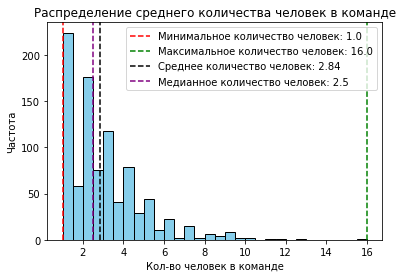

In [17]:
min_relationships = df['avg_participants'].min()
max_relationships = df['avg_participants'].max()
mean_relationships = round(df['avg_participants'].mean(), 2)
median_relationships = df['avg_participants'].median()

plt.figure(figsize=(6, 4))
plt.hist(df['avg_participants'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Кол-во человек в команде')
plt.ylabel('Частота')
plt.title('Распределение среднего количества человек в команде')
plt.axvline(x=min_relationships, color='red', linestyle='--', label=f'Минимальное количество человек: {min_relationships}')
plt.axvline(x=max_relationships, color='green', linestyle='--', label=f'Максимальное количество человек: {max_relationships}')
plt.axvline(x=mean_relationships, color='black', linestyle='--', label=f'Среднее количество человек: {mean_relationships}')
plt.axvline(x=median_relationships, color='purple', linestyle='--', label=f'Медианное количество человек: {median_relationships}')
plt.legend()
plt.show()

### Среднее количество человек в команде варьируется от 1 до 16 при среднем, равном 2.84, и медиане, равной 2.5. Преимущественно над стартапом работает от 1 до 3 человек

## Корреляционная матрица

In [57]:
df = pd.read_csv("startup data.csv")
df_corr = df.drop(['Unnamed: 0', 'Unnamed: 6', 'city','state_code', 'latitude', 'longitude', 'zip_code', 'id', 'labels', 'object_id', 'name', 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'age_first_funding_year', 'state_code.1', 'category_code'], axis=1)
df_corr['status'] = df_corr['status'].replace({'acquired': 1, 'closed': 0})

In [59]:
correlation_matrix = df_corr.corr()
correlation_matrix

,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
age_last_funding_year,1.000000,0.687515,0.632099,0.073080,0.385999,0.116371,-0.122905,0.006190,-0.143312,0.096325,...,0.091918,0.351044,-0.354470,-0.099762,0.258928,0.317469,0.312340,0.122893,0.200727,0.073731
age_first_milestone_year,0.687515,1.000000,0.777484,0.245364,0.195207,0.063900,-0.054482,0.033649,-0.095814,0.045427,...,0.031647,0.109566,-0.278960,0.014977,0.190824,0.209076,0.253121,0.055704,0.155329,0.162279
age_last_milestone_year,0.632099,0.777484,1.000000,0.348534,0.262056,0.093529,0.333244,0.060217,-0.092801,0.028026,...,-0.001843,0.089589,-0.249427,0.113306,0.261767,0.278814,0.252636,0.083480,0.206859,0.265871
relationships,0.073080,0.245364,0.348534,1.000000,0.358883,0.093790,0.513835,0.105754,0.049912,-0.004689,...,-0.073963,-0.028938,-0.060625,0.317130,0.285015,0.259842,0.207488,0.115061,0.222207,0.360434
funding_rounds,0.385999,0.195207,0.262056,0.358883,1.000000,0.115800,0.230162,0.010258,0.007431,0.079527,...,-0.012769,0.334832,0.010606,0.260598,0.444454,0.440923,0.323620,0.043044,0.259345,0.206049
funding_total_usd,0.116371,0.063900,0.093529,0.093790,0.115800,1.000000,0.012056,-0.027545,-0.024488,-0.005667,...,-0.011932,0.010060,-0.059650,-0.023721,0.020119,0.045405,0.045146,0.046250,0.048978,0.040176
milestones,-0.122905,-0.054482,0.333244,0.513835,0.230162,0.012056,1.000000,0.036172,0.104795,0.017559,...,-0.136482,-0.093338,0.128255,0.319986,0.195162,0.085329,0.020663,0.043533,0.171412,0.328260
is_CA,0.006190,0.033649,0.060217,0.105754,0.010258,-0.027545,0.036172,1.000000,-0.380683,-0.332216,...,0.031408,-0.068587,-0.059741,0.076151,0.093337,0.074752,0.083008,0.069158,0.098677,0.077217
is_NY,-0.143312,-0.095814,-0.092801,0.049912,0.007431,-0.024488,0.104795,-0.380683,1.000000,-0.113225,...,-0.016157,-0.047607,0.148298,0.021334,-0.066628,-0.061830,-0.063132,0.068394,-0.015463,0.059996
is_MA,0.096325,0.045427,0.028026,-0.004689,0.079527,-0.005667,0.017559,-0.332216,-0.113225,1.000000,...,-0.055058,0.031772,-0.070697,-0.001321,0.088797,0.068687,0.034475,0.004847,0.085095,0.081735


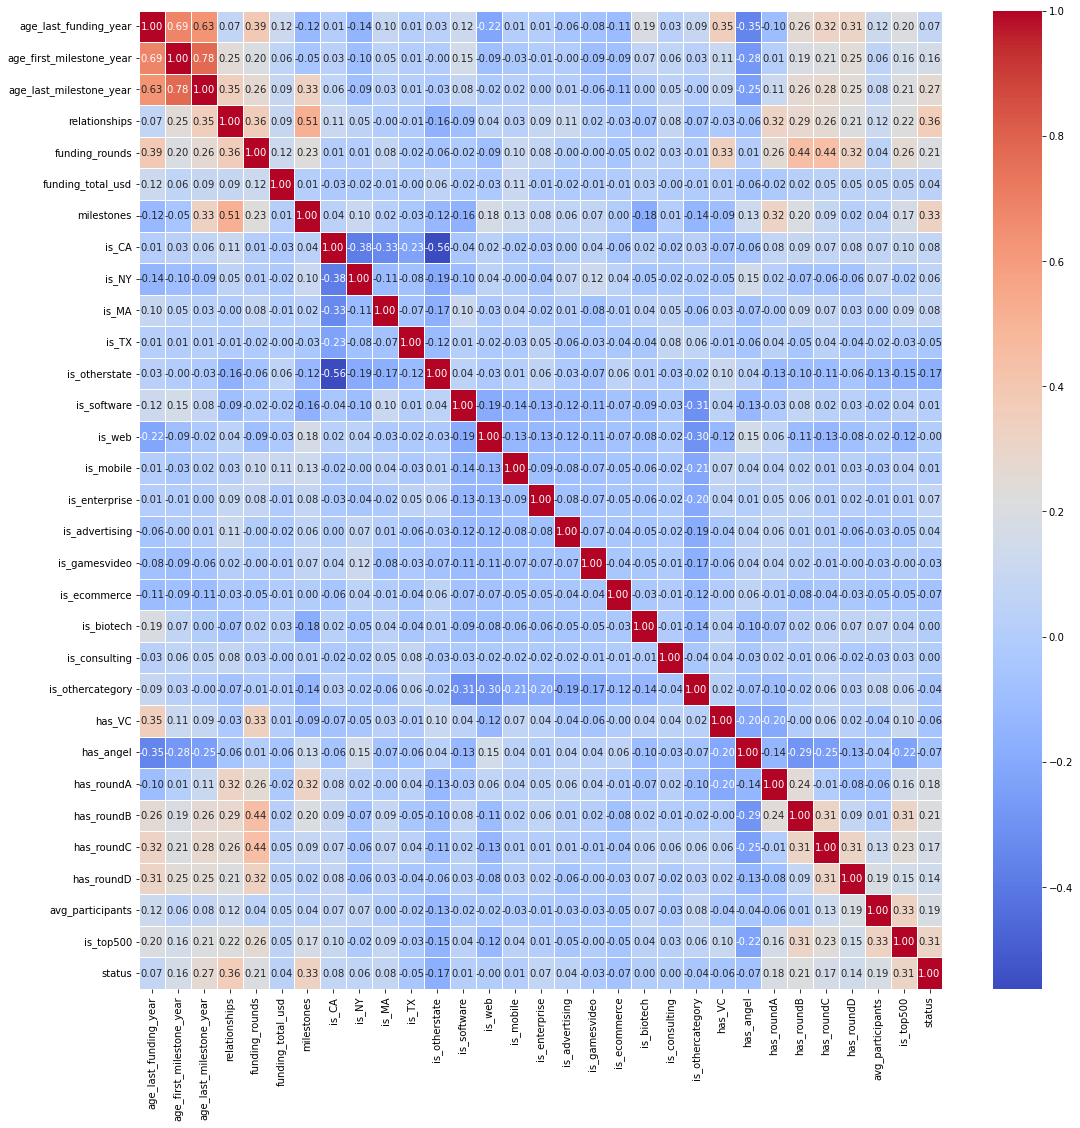

In [60]:
plt.figure(figsize=(18, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

### Наша целевая колонка status имеет наиболее сильную корреляцию с такими параметрами как: кол-во партнерств с другими бизнесами, кол-во пройденных сложных этапов, наличие компании в топ-500

### В то же время, успешность бизнеса слабо зависит от его территориального расположения, от наличия инвестиций от бизнес-ангела, почти не зависит от сферы бизнеса, а также от кол-ва привлеченных денег с инвестиций

## Распределения стартапов

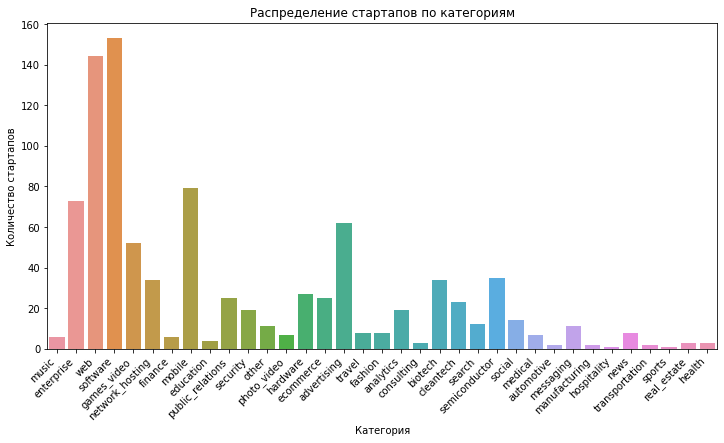

In [49]:
plt.figure(figsize=(12, 6))
sns.countplot(x='category_code', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Распределение стартапов по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество стартапов')
plt.show()

### Самые популярные сферы стартапов - IT разработка, маркетинг, мобильные приложения, полупроводники, медицина

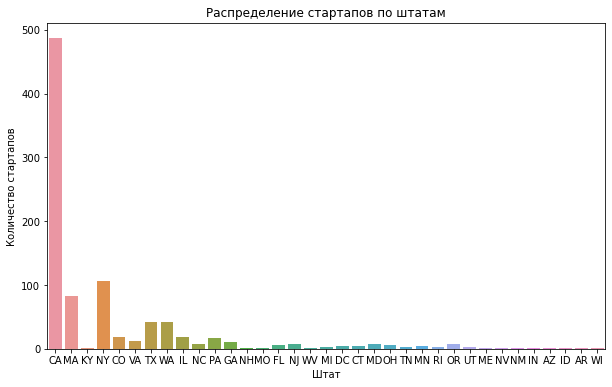

In [56]:
plt.figure(figsize=(10, 6))
sns.countplot(x='state_code.1', data=df)
plt.title('Распределение стартапов по штатам')
plt.xlabel('Штат')
plt.ylabel('Количество стартапов')
plt.show()

### Подавляющее большинство стартапов в выборке оказалось из Калифорнии

### Сравнение успешных и неуспешных стартапов

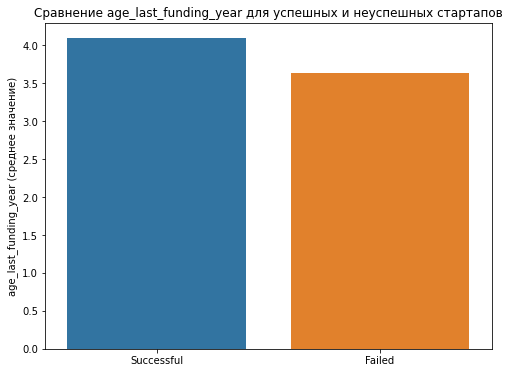

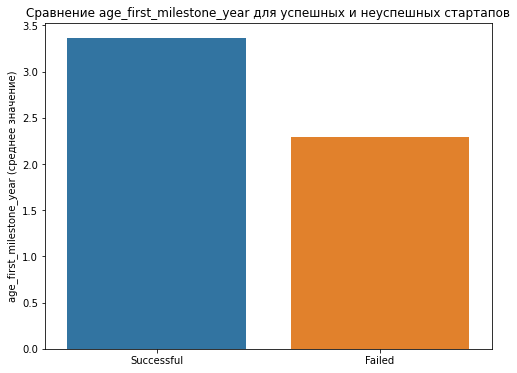

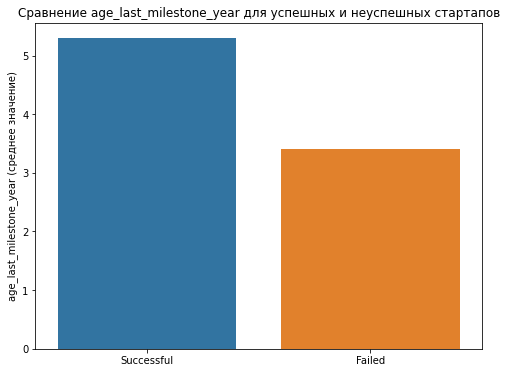

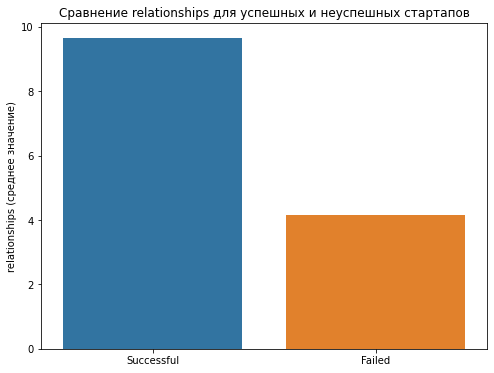

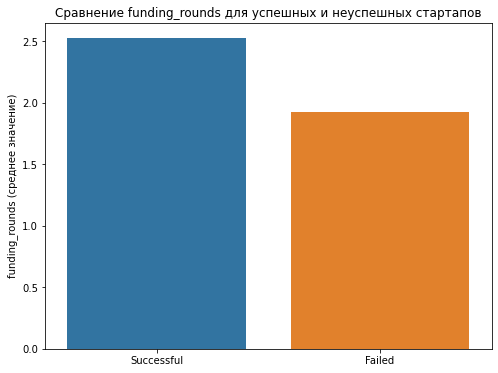

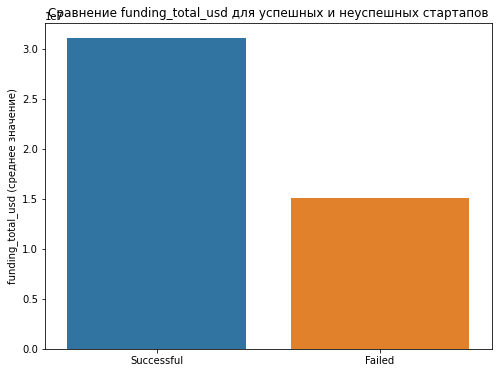

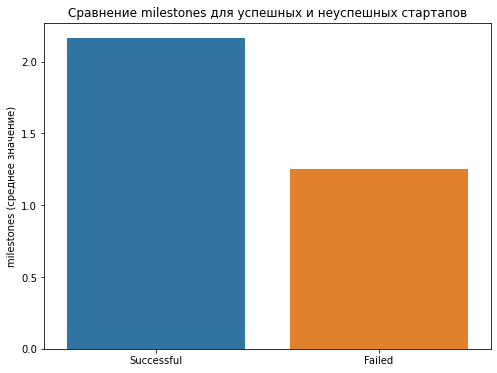

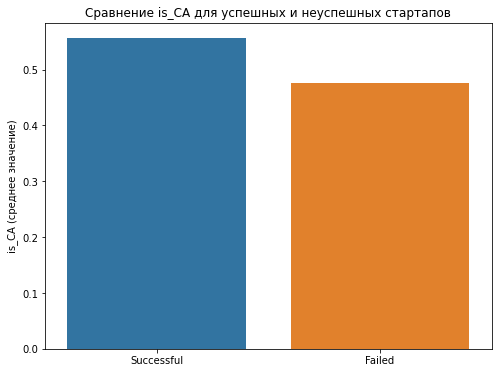

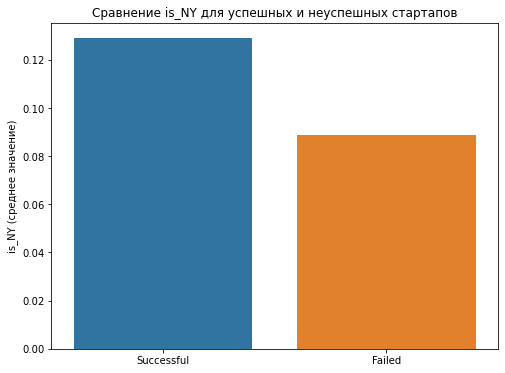

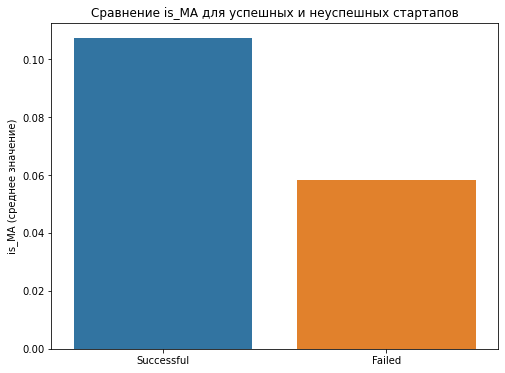

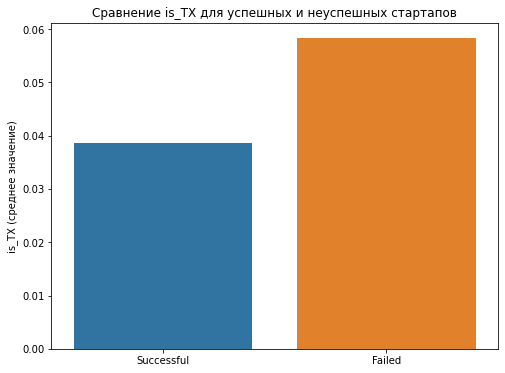

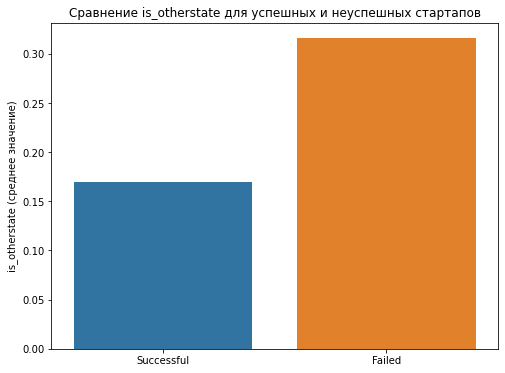

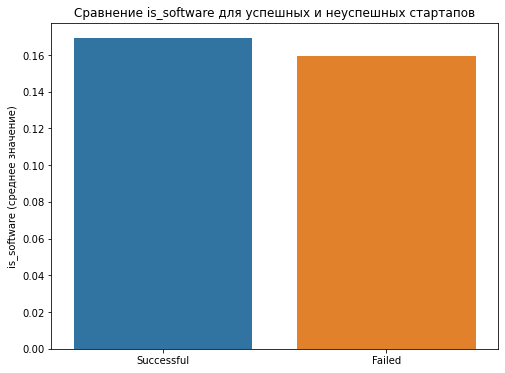

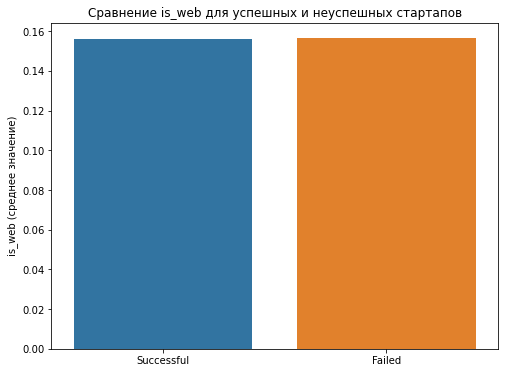

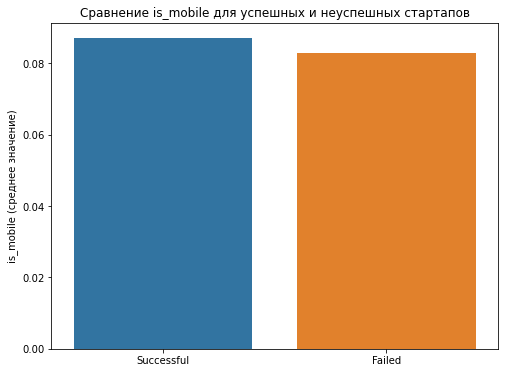

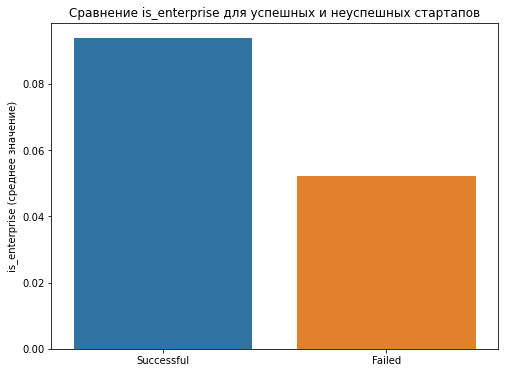

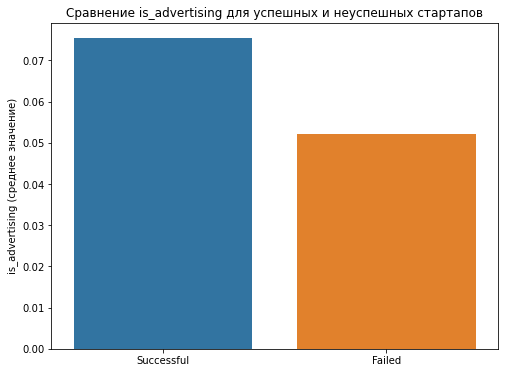

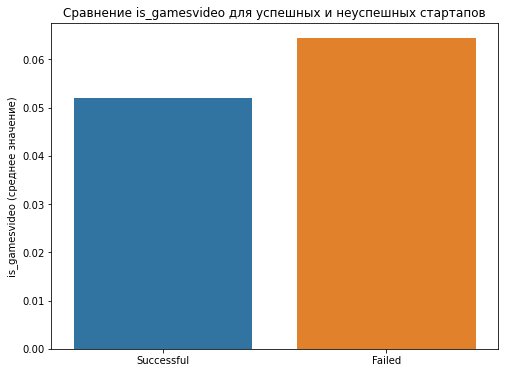

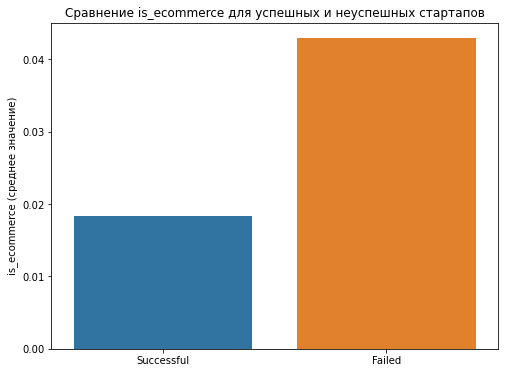

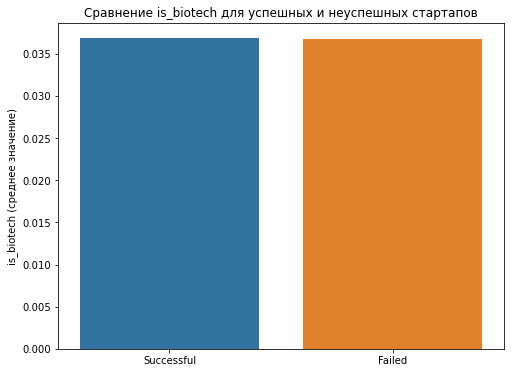

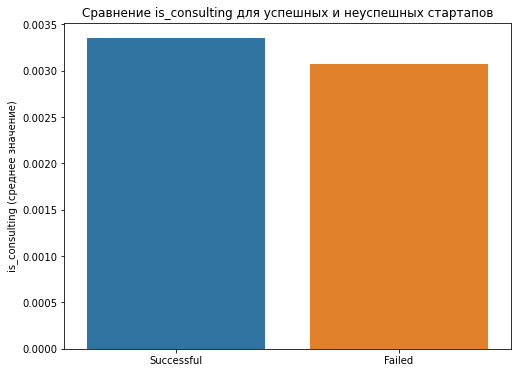

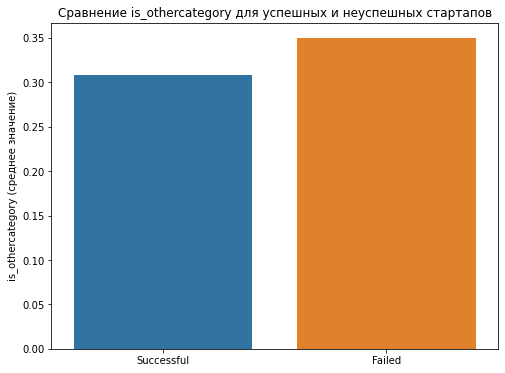

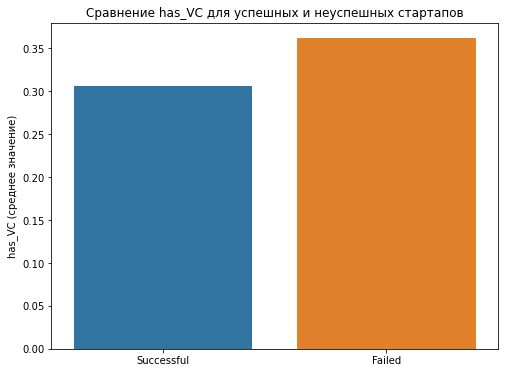

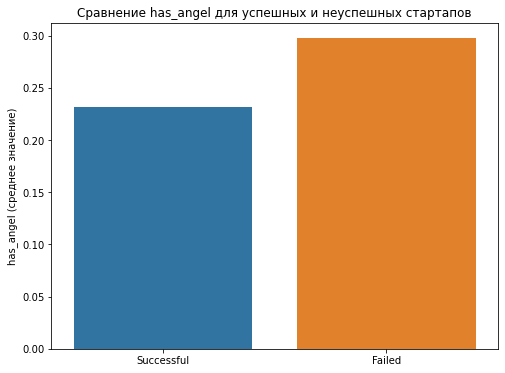

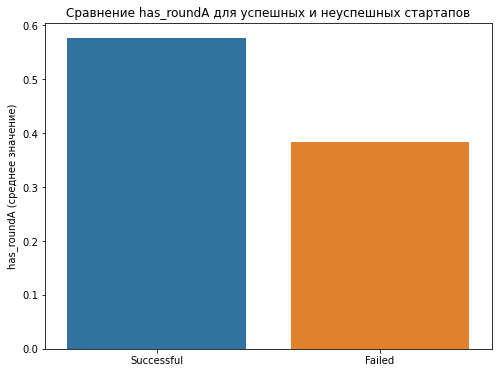

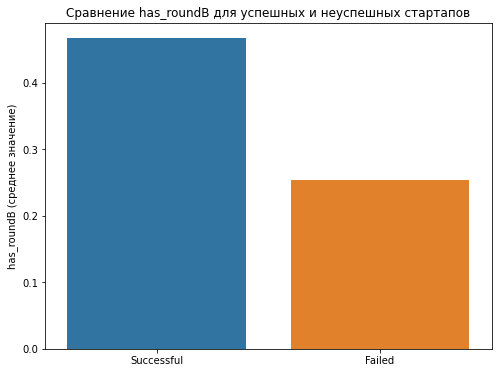

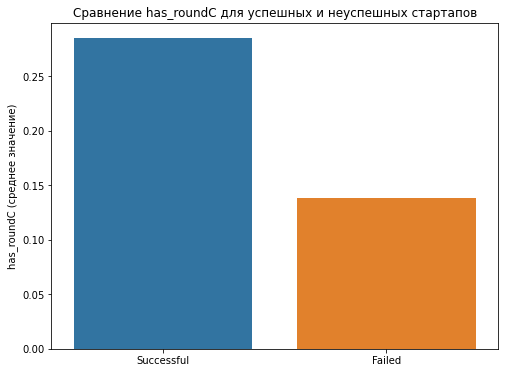

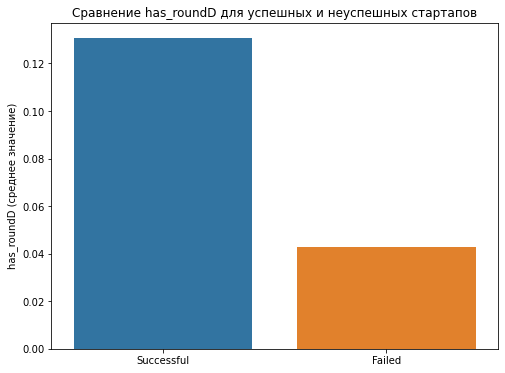

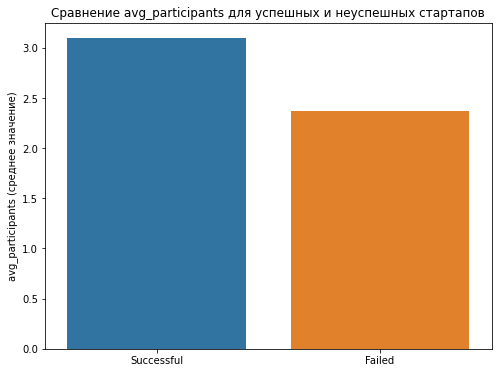

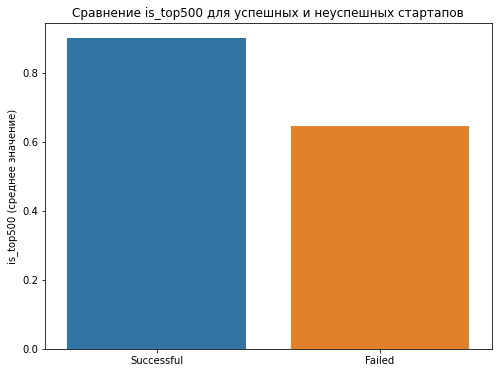

In [73]:
successful_startups = df_corr[df_corr['status'] == 1]
failed_startups = df_corr[df_corr['status'] == 0]

successful_startups = successful_startups.drop(['status'], axis=1)
failed_startups = failed_startups.drop(['status'], axis=1)

mean_successful = successful_startups.mean()
mean_failed = failed_startups.mean()

comparison_df = pd.DataFrame({
    'Successful': mean_successful,
    'Failed': mean_failed
})

for feature in comparison_df.index:
    plt.figure(figsize=(8, 6))
    sns.barplot(x=comparison_df.columns, y=comparison_df.loc[feature])
    plt.title(f'Сравнение {feature} для успешных и неуспешных стартапов')
    plt.ylabel(f'{feature} (среднее значение)')
    plt.show()

### - У успешных стартапов в среднем более чем в 2 раза больше партнерств с другими бизнесами
### - Успешные стартапы в среднем привлекают в 2 раза больше денег с инвестиций
### - Успешных энтерпрайз стартапов (работа на крупных или корпоративных рынках B2B) в 1,5 раза больше, чем неуспешных
### - В сфере геймдева больше неуспешных, чем успешных стартапов
### - Неуспешных стартапов с сфере e-com в 2 раза больше, чем успешных
### - Неуспешные стартапы чаще привлекали инвестиции от венчурных инвесторов и бизнес-ангелов
### - Успешные стартапы намного чаще привлекали все 4 раунда инвестиций

# Итоги анализа: каковы ключевые факторы успеха стартапа?

1. Больше партнерств с другими бизнесами - лучше (корреляция = 0.36)
2. Больше прохождений ключевых этапов развития стартапа (MVP, привлечение раундов и тд) - лучше (корреляция = 0.33)
3. В сфере энтерпрайз наилучшее отношение кол-ва успешных стартапов к неуспешным

# Что, как ни странно, слабо влияет на успех стартапа?

1. Территориальное расположение стартапа
2. Кол-во привлеченных денег с инвестиций (некоторые компании много привлекли, но все равно обанкротились)
3. Наличие инвестиций от бизнес-ангела
4. Выбор конкретной ниши стартапа

# Шаг 2. Создание модели, которая будет предсказывать, станет стартап успешным или нет

В данной задаче требуется спрогнозировать успешность стартапа (бинарная классификация), поэтому можно использовать следующие модели машинного обучения:

1. Логистическая регрессия: Это классическая модель для бинарной классификации, которая хорошо работает с данными разного масштаба и относительно интерпретируема.

2. Случайный лес (Random Forest): Модель ансамбля деревьев решений, которая способна обрабатывать как категориальные, так и числовые признаки, и обычно хорошо работает с наборами данных с большим количеством признаков.

## Логистическая регрессия

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [8]:
df.head()

,city,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,San Diego,Bandsintown,1/1/2007,0,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,...,1,0,1,0,0,0,0,1.0000,0,acquired
1,Los Gatos,TriCipher,1/1/2000,0,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,...,0,1,0,0,1,1,1,4.7500,1,acquired
2,San Diego,Plixi,3/18/2009,0,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,...,0,0,0,1,0,0,0,4.0000,1,acquired
3,Cupertino,Solidcore Systems,1/1/2002,0,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,...,0,0,0,0,1,1,1,3.3333,1,acquired
4,San Francisco,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,...,0,1,1,0,0,0,0,1.0000,1,closed


In [60]:
df = df.drop(['city', 'name', 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'state_code.1', 'category_code'], axis=1)

### Определение признаков (X) и целевой переменной (y)

In [61]:
X = df.drop(columns=['status'])
y = df['status']

### Разделение данных на обучающий и тестовый наборы

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Стандартизация признаков

In [63]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Обучение логистической регрессии

In [64]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

### Предсказание на тестовом наборе и оценка качества модели

In [70]:
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print('\n', classification_report(y_test, y_pred))

Accuracy: 0.7405405405405405

               precision    recall  f1-score   support

    acquired       0.81      0.82      0.82       129
      closed       0.57      0.55      0.56        56

    accuracy                           0.74       185
   macro avg       0.69      0.69      0.69       185
weighted avg       0.74      0.74      0.74       185



### Выводы:

**Точность модели:** Модель имеет достаточно высокую точность (accuracy) в 74%, что означает, что она правильно классифицировала 74% всех стартапов. В целом, неплохой результат.

**Precision (точность результатов):** Для класса "acquired" precision составляет 81%, что означает, что 81% стартапов, распознанных моделью как успешные, являются на самом деле успешными. Для класса "closed" precision равен 57%, что не так уж и много.

**Recall (полнота):** Для класса "acquired" recall составляет 82%, что означает, что 82% всех реально успешных стартапов были распознаны как успешные. Для класса "closed" recall равен 55%, что еще раз указывает на то, что модель имеет трудности с определением класса "closed".

**F1-score (F-мера):** F1-score для класса "acquired" составляет 0.82, что говорит о хорошем балансе между точностью и полнотой. Для класса "closed" F1-score равен 0.56, что подтверждает описанные выше комментарии.

## Случайный лес

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [49]:
df.head()

,city,name,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,San Diego,Bandsintown,1/1/2007,0,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,...,1,0,1,0,0,0,0,1.0000,0,acquired
1,Los Gatos,TriCipher,1/1/2000,0,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,...,0,1,0,0,1,1,1,4.7500,1,acquired
2,San Diego,Plixi,3/18/2009,0,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,...,0,0,0,1,0,0,0,4.0000,1,acquired
3,Cupertino,Solidcore Systems,1/1/2002,0,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,...,0,0,0,0,1,1,1,3.3333,1,acquired
4,San Francisco,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,...,0,1,1,0,0,0,0,1.0000,1,closed


In [50]:
df = df.drop(['city', 'name', 'founded_at', 'closed_at', 'first_funding_at', 'last_funding_at', 'state_code.1', 'category_code'], axis=1)

### Определение признаков (X) и целевой переменной (y)

In [51]:
X = df.drop(columns=['status'])
y = df['status']

### Разделение данных на обучающий и тестовый наборы

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Обучение случайного леса

In [53]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Предсказание на тестовом наборе и оценка качества модели

In [54]:
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print('\n', classification_report(y_test, y_pred))

Accuracy: 0.7891891891891892

               precision    recall  f1-score   support

    acquired       0.81      0.91      0.86       129
      closed       0.71      0.52      0.60        56

    accuracy                           0.79       185
   macro avg       0.76      0.71      0.73       185
weighted avg       0.78      0.79      0.78       185



### Выводы:

**Точность модели:** Модель имеет достаточно высокую точность (accuracy) в 79%, что означает, что она правильно классифицировала 79% всех стартапов. Результат чуть лучше, чем с логистической регрессией.

**Precision (точность результатов):** Для класса "acquired" precision составляет 81%, что означает, что 81% стартапов, распознанных моделью как успешные, являются на самом деле успешными. Для класса "closed" precision равен 71%, что значительно лучше результата логистической регрессии.

**Recall (полнота):** Для класса "acquired" recall составляет 91%, что означает, что 91% всех реально успешных стартапов были распознаны как успешные. Для класса "closed" recall равен 52%. В среднем результаты для recall здесь чуть лучше, чем у логистической регрессии.

**F1-score (F-мера):** F1-score для класса "acquired" составляет 0.86 для класса "closed" F1-score равен 0.60. Для обоих классов результаты оказались лучше, чем в случае логистической регрессии.

# Итоги машинного обучения:

1. Для текущего датасета обучение модели с помощью случайного леса оказался более эффективным, чем обучение с помощью логистической регрессии.
2. Модель научилась хорошо распознавать стартапы, которые преуспели, однако провалившиеся стартапы модель предсказывала не с такой высокой точностью.
3. Более низкая точность предсказаний для неуспешных стартапов связана с неравномерным распределением классов в датасете (597 успешных vs 325 неуспешных)